In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/nicho/Documents/ironhack/Project 3/project-nlp-challenge/dataset/data.csv')

print(df.head())
print(df.columns)

   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
Index(['label', 'title', 'text', 'subject', 'date'], dty

In [3]:
print(df['label'].value_counts())   # See how many real vs. fake
print(df.isnull().sum())            # Check for missing values


label
1    19999
0    19943
Name: count, dtype: int64
label      0
title      0
text       0
subject    0
date       0
dtype: int64


In [4]:
df['cleaned'] = df['title'].apply(clean_text)
print(df[['title', 'cleaned']].head())


NameError: name 'clean_text' is not defined

In [ ]:
print(df.columns)

Index(['label', 'title', 'text', 'subject', 'date', 'cleaned'], dtype='object')


In [ ]:
#Cleaning the text data
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

df['cleaned'] = df['title'].apply(clean_text)
print(df[['title', 'cleaned']].head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                             cleaned  
0  budget fight looms republicans flip fiscal script  
1  military accept transgender recruits monday pe...  
2       senior republican senator let mr mueller job  
3  fbi russia probe helped australian diplomat ti...  
4  trump wants postal service charge amazon shipm...  


In [ ]:
# Create a TF-IDF vectorizer and transform the cleaned text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])


In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

y = df['label']  # this should be 0/1, or 'real'/'fake'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate Performance
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3996
           1       0.93      0.96      0.95      3993

    accuracy                           0.95      7989
   macro avg       0.95      0.95      0.95      7989
weighted avg       0.95      0.95      0.95      7989

Accuracy: 0.9450494429841031


In [ ]:
# STEP 2 - Combine

In [ ]:
# Combine title and text
df['all_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df['cleaned_all'] = df['all_text'].apply(clean_text)

# Vectorize the new combined column
X_all = vectorizer.fit_transform(df['cleaned_all'])

# Split, train, and evaluate as before
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3996
           1       0.99      0.99      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989

Accuracy: 0.989735886844411


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3996
           1       0.92      0.96      0.94      3993

    accuracy                           0.94      7989
   macro avg       0.94      0.94      0.94      7989
weighted avg       0.94      0.94      0.94      7989

Naive Bayes Accuracy: 0.9411691075228439


In [ ]:
# Words most associated with Fake / Real news
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]
top_positive = np.argsort(coefs)[-10:]
top_negative = np.argsort(coefs)[:10]

print("Words most associated with FAKE:")
for i in top_positive:
    print(feature_names[i])

print("\nWords most associated with REAL:")
for i in top_negative:
    print(feature_names[i])


Words most associated with FAKE:
friday
thursday
the
tuesday
wednesday
it
we
washington
said
reuters

Words most associated with REAL:
video
just
image
gop
hillary
like
obama
america
images
mr


In [5]:
#Validation set

In [6]:
import pandas as pd

# Load main dataset and validation set
df = pd.read_csv('C:/Users/nicho/Documents/ironhack/Project 3/project-nlp-challenge/dataset/data.csv')
validation_df = pd.read_csv('C:/Users/nicho/Documents/ironhack/Project 3/project-nlp-challenge/dataset/validation_data.csv')
print(df.head())
print(validation_df.head())


   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
   label                                              ti

In [7]:
#2. preprocess the validation set
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

df['cleaned_title'] = df['title'].apply(clean_text)
validation_df['cleaned_title'] = validation_df['title'].apply(clean_text)


In [8]:
#3. Split the main dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df['cleaned_title']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#4. Feature Extraction (TF-IDF Vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_validation_vec = vectorizer.transform(validation_df['cleaned_title'])


In [10]:
#5. Train a Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [11]:
# 6. Evaluate Model (Estimate Accuracy)
from sklearn.metrics import classification_report, accuracy_score

y_test_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3996
           1       0.93      0.96      0.95      3993

    accuracy                           0.95      7989
   macro avg       0.95      0.95      0.95      7989
weighted avg       0.95      0.95      0.95      7989

Test Accuracy: 0.9451746150957566


In [ ]:
# USE ABOVE TEST ACCURACY IN PRESENTATION

In [12]:
# 7. Predict on Validation Set
validation_preds = model.predict(X_validation_vec)


In [13]:
# SAVE PREDICTIONS
output_df = validation_df.copy()
output_df['label'] = validation_preds  # Replace label column

# Only keep the original columns (no extra columns)
output_df = output_df[df.columns]  # keep same order as data.csv

output_df.to_csv('validation_predictions.csv', index=False)


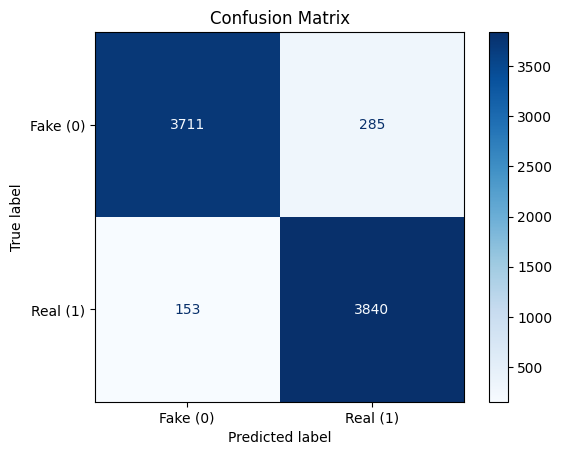

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions for your test set
y_test_pred = model.predict(X_test_vec)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake (0)', 'Real (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
